<a href="https://colab.research.google.com/github/erdogan98/DATA_SCIENCE/blob/main/A1_coursework_template_MSc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **COMP6685 Deep Learning Coursework A1**


Individual (25% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-d7295205-fdbb-cd6c-6fca-f5365b376708)


Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [2]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#import all the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalizationV2
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger
from livelossplot import PlotLossesKeras
from tensorflow.keras import utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers

In [5]:
# your code here
#data =  tf.keras.datasets.fashion_mnist.load_data()
data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

In [6]:
data.shape

(60000, 785)

In [7]:
#separating input and output
output = data[["label"]]
input_image = data.drop(['label'],axis=1)

test_output = test_data[["label"]]
test_input_image = test_data.drop(['label'],axis=1)

In [8]:
from keras.utils.np_utils import to_categorical
# Reshape data
input_image = input_image.values.reshape(-1, 28, 28, 1)
test = test_input_image.values.reshape(-1, 28, 28, 1)

# One-Hot encoding
output = to_categorical(output, num_classes=10)

In [9]:
#train-test spilit // cross validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_image, output, test_size=0.3, random_state=42)

Visualise a random sample image of the dataset. **(5 marks)**

---



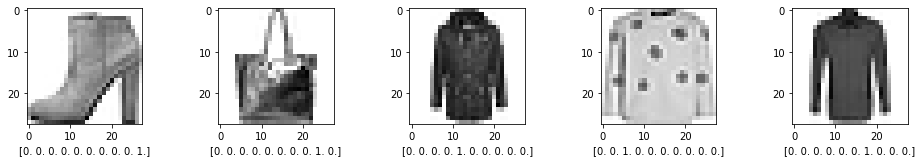

In [13]:
# your code here
#printing a sample image
plt.figure(figsize=(20,20))
#showing 5 images
for i in range(5):
    plt.subplot(8,6, i+1)
    plt.imshow(np.array(X_train[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((42000, 28, 28, 1), (42000, 10), (18000, 28, 28, 1), (18000, 10))

*your answer here*

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [66]:
model = Sequential()

drop = 0.6
leaky = tf.keras.layers.LeakyReLU(alpha=0.001)
relu = tf.keras.layers.ReLU()



#input

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(drop))
model.add(Dense(
    units=32,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
))
model.add(Dropout(0.6))

model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(drop))
model.add(Dense(
    units=32,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
))
model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(8192, activation='relu'))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8192, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(10, activation="softmax"))

In [67]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
model.compile(optimizer=RMSprop(lr=0.0001, rho=0.91, epsilon=1e-06, decay=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy",precision,recall])


model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 dense_38 (Dense)            (None, 9, 9, 32)          2080      
                                                                 
 dropout_34 (Dropout)        (None, 9, 9, 32)          0         
                                                     

Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [71]:
   
#Data augmentation
# data_generator = ImageDataGenerator(rescale=1./255,
#                                     rotation_range=45,
#                                     zoom_range=0.1, 
#                                     width_shift_range=0.1,
#                                     height_shift_range=0.1)
data_generator = ImageDataGenerator(
                                    rotation_range=90
    )

In [ ]:
from sklearn.utils import shuffle
n_splits=3
epochs=50
batch_size=128

#save the model history in a list after fitting so that it can be plotted later

model_history = []


#k-fold cross validation

import numpy as np
from sklearn.model_selection import cross_validate

X = input_image
y = output
kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)

for training, testing in kf.split(X):
    print("TRAIN:", training[0:5], "TEST:", testing[0:5])
    X_train, X_test = X[training], X[testing]
    y_train, y_test = y[training], y[testing]

    # normalisation of the pixel values from 0-255 range to 0-1 range 
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    data_generator.fit(X_train)

    model_history.append(model.fit(data_generator.flow(X_train,
                                                  y_train,
                                                  batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              shuffle=True,
                              verbose=1,
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              # callbacks=[PlotLossesKeras(),
                              #                     CSVLogger("training_logs.csv",
                              #                      append=False,
                              #                      separator=";")
                              #                     ]
                              ))
    print("======="*12, end="\n\n\n")


Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [91]:
#saving the model
model.save('mnist-fashion-model-DL-A1.h5')

In [78]:
#in this code block, I am taking tha average of each accuracy and loss values from every epoch in the training process
#then taking the mean of all average value

avg_train_accuracy = list()
avg_training_loss = list()
avg_test_accuracy = list()
avg_testing_loss = list()

for i in model_history:

    avg_acc = sum(i.history['accuracy'])/len(i.history['accuracy'])
    avg_train_accuracy.append(avg_acc)
                                                            
    avg_loss = sum(i.history['loss'])/len(i.history['loss'])
    avg_training_loss.append(avg_loss)
                                                            
    val_acc = sum(i.history['val_accuracy'])/len(i.history['val_accuracy'])
    avg_test_accuracy.append(val_acc)

    val_acc = sum(i.history['val_loss'])/len(i.history['val_loss'])
    avg_testing_loss.append(val_acc)

print('Avereage Results: ')
print('Training Accuracy')
print(sum(avg_train_accuracy)/len(avg_train_accuracy))
print('Training Loss')
print(sum(avg_training_loss)/len(avg_training_loss))
print('Validation Accuracy')
print(sum(avg_test_accuracy)/len(avg_test_accuracy))
print('Validation Loss')
print(sum(avg_testing_loss)/len(avg_testing_loss))
    

Avereage Results: 
Training Accuracy
0.7333069163560868
Training Loss
0.7850876148541769
Validation Accuracy
0.7888316651185354
Validation Loss
0.5918814539909363


In [76]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 4ms/step - loss: 0.5063 - accuracy: 0.8162 - precision_10: 0.8730 - recall_10: 0.7649


[0.5062956809997559,
 0.8162000179290771,
 0.8730312585830688,
 0.7649499773979187]

*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

In [94]:
#zipping and saving the keras model
#!zip -r /content/mnist-fashion-model-DL-A1.zip /content/mnist-fashion-model-DL-A1

  adding: content/mnist-fashion-model-DL-A1/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/assets/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/keras_metadata.pb (deflated 93%)
  adding: content/mnist-fashion-model-DL-A1/saved_model.pb (deflated 90%)
  adding: content/mnist-fashion-model-DL-A1/variables/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/variables/variables.index (deflated 70%)
  adding: content/mnist-fashion-model-DL-A1/variables/variables.data-00000-of-00001 (deflated 10%)


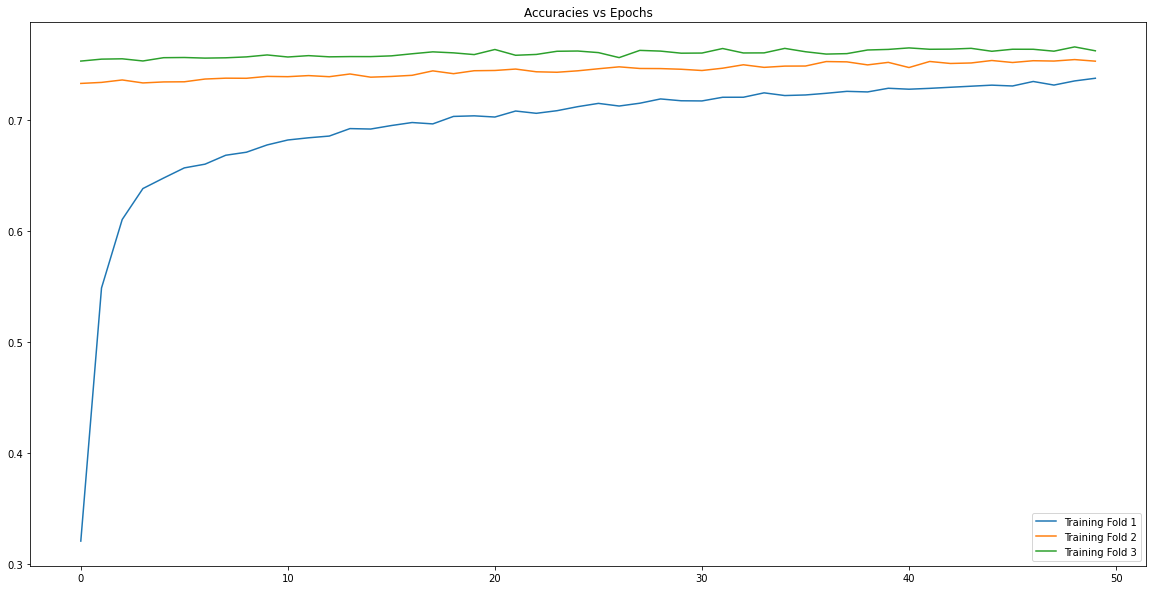

In [88]:
plt.figure(figsize=(20,10))
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

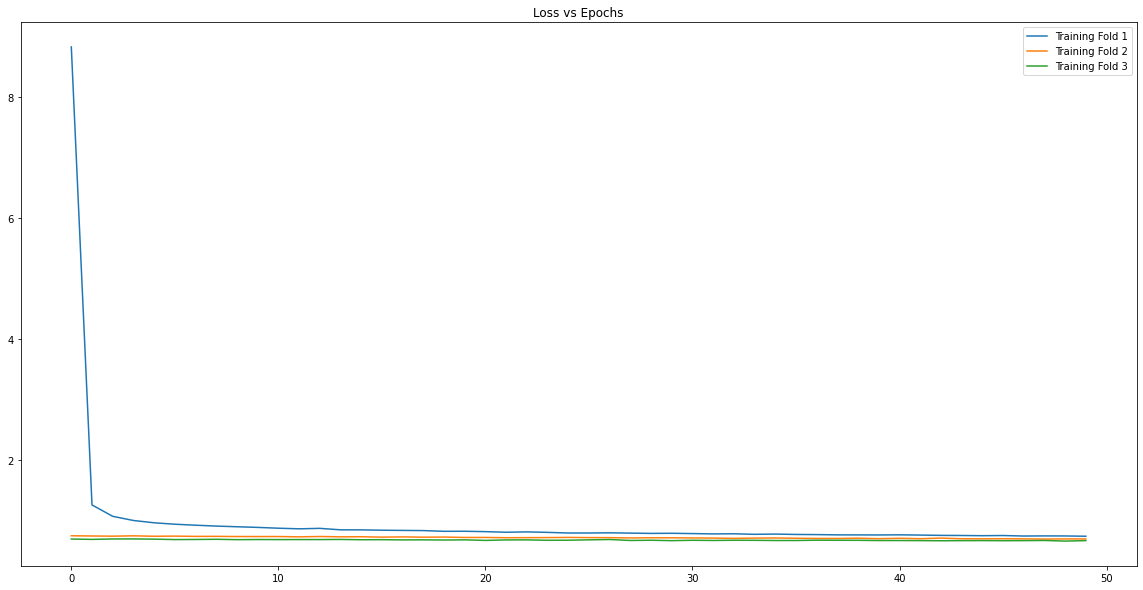

In [87]:
plt.figure(figsize=(20,10))
plt.title('Loss vs Epochs')
plt.plot(model_history[0].history['loss'], label='Training Fold 1')
plt.plot(model_history[1].history['loss'], label='Training Fold 2')
plt.plot(model_history[2].history['loss'], label='Training Fold 3')
plt.legend()
plt.show()

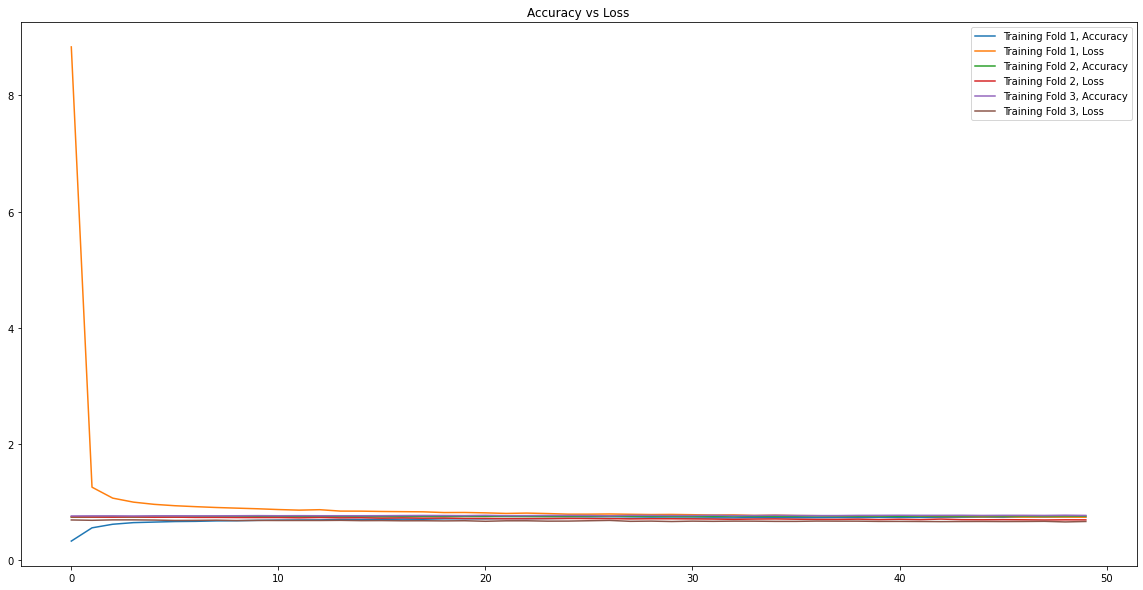

In [86]:
plt.figure(figsize=(20,10))
plt.title('Accuracy vs Loss')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1, Accuracy')
plt.plot(model_history[0].history['loss'], label='Training Fold 1, Loss')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2, Accuracy')
plt.plot(model_history[1].history['loss'], label='Training Fold 2, Loss')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3, Accuracy')
plt.plot(model_history[2].history['loss'], label='Training Fold 3, Loss')
plt.legend()
plt.show()

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

*your answer here*

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

*your answer here*

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

